In [9]:
# import packages
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from scipy.optimize import fsolve
import scipy.stats as stats

import statsmodels.api as sm
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Use Python to answer the following questions. Show the code and provide complete sentences as your answers. Submit the .ipynb to Canvas. 

# Q1

If the weekly sales quantity of a product follows a Normal distribution with $\mu = 100$ and $\sigma = 10$.

a) What is the probalitiy that the sales quantity is between 90 and 95 in a week?   
b) What is the minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout (sales greater than inventory) is less than 10%?

In [33]:
# Importing librabries
import numpy as np
import pandas as pd
from statistics import median
from scipy.stats import poisson
from scipy import stats
from scipy.special import ndtr as ndtr

## **Q1 Part A**

In [44]:
# Initializing variables
# For the normal deistribution
Mu, sigma = 100, 10 # μ=100 and  σ=10
ulimit, llimit = 95, 90 # sales quantity is between 90 and 95 in a week

In [45]:
# Calculating Zscore to see how many std deviations is the observered value from the mean
# zscore_upper=(ulimit-Mu)/sigma
# zscore2_lower(llimit-Mu)/sigma

zscore_upper = (ulimit - Mu) / sigma
zscore_lower = (llimit - Mu) / sigma

print(f'Zscore for upper limit is {zscore_upper}')
print(f'Zscore for lower limit is {zscore_lower}')

# normal_dist = np.random.normal(Mu, sigma, ulimit)

Zscore for upper limit is -0.5
Zscore for lower limit is -1.0


In [46]:
# Calculating the probability of the lower limit value and the Upper limit value

pulimit = 1 - ndtr(zscore_upper)
pllimit = 1 - ndtr(zscore_lower)

print(pulimit)
print(pllimit)

0.6914624612740131
0.8413447460685429


In [47]:
# The differnce between the probablities is the probablility that the sales quantity is between 90 and 95 in a week
pvalue = pulimit - pllimit

In [48]:
print(f'Probablility that the sales quantity is between 90 and 95 in a week is {pvalue}')

Probablility that the sales quantity is between 90 and 95 in a week is -0.1498822847945298


In [49]:
1 - ndtr(1.2816)

0.09999150009767521

## **Q1 Part B**

In [50]:
# Calculating Z-score for stockout not happening 90% of the times
desired_zscore = stats.norm.ppf(.90)

Zscore needs to be 1.2815515655446004 or higher for the stockout to happen 10 % or less the 10% of the times

In [43]:
# μ=100 and  σ=10 have been initialized in Part A of the problem and the values have been provided
# To calculate minimum quantity (Mq) we need to apply the formulae Mu + desired_zscore * sigma

Mq = Mu + desired_zscore * sigma

print(f'The minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout less than 10% of the times is {Mq}')


The minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout less than 10% of the times is 112.815515655446


# Q2
Suppose that in Hoboken, the number of traffic accidents can be approximated by a Poisson distribution with λ = 2.5 per month. 

a) What is the probability of five or more than five traffic accidents in one month?   
b) What is the median number of traffic accidents in one month?

## **Q2 Part A**


In [19]:
# All values of the distribution below 5 for number of accidents
# values taken into account are 0, 1, 2, 3, 4

In [20]:
lam = 2.5

In [100]:
prob_5ormore = 1 - (poisson.pmf(4, lam) + poisson.pmf(3, lam) + poisson.pmf(2, lam) + poisson.pmf(1, lam) + poisson.pmf(0, lam))

In [101]:
print(f'Probability of five or more than five traffic accidents in one month is {prob_5ormore}')

Probability of five or more than five traffic accidents in one month is 0.10882198108584851


## **Q2 Part B**


In [23]:
# Generating random sample for 2000 data points for the possion distribustion lamda = 2.5

sample_data = poisson.rvs(lam, size=2000) # Note: Value of lam is 2.5 and is set above


In [24]:
# Calculating median
median_final = median(sample_data)

In [25]:
print (f'The median value of a randomly generated sample with lambda = 2.5 is {median_final}')

The median value of a randomly generated sample with lambda = 2.5 is 2.0


# Q3.

Assuming that the following data (raw_data_hw) is generated by a Beta distribution, find the MLE for a and b.

Hints: 
1. You need to use the [scipy.stats.beta class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).  
2. The 'true' parameters are a = 4, b = 2. You estimates shouldn't be far off. 

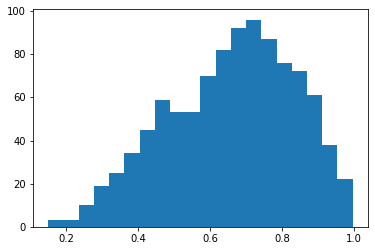

In [51]:
raw_data_hw = np.loadtxt('https://fmai-teaching.s3.amazonaws.com/bia652/est/b.txt')
histogram = plt.hist(raw_data_hw, bins=20)

In [102]:

from scipy.stats import beta

#let's define a function to optimize 
def negLL_beta(params, raw_data):
   a,b = params[0], params[1]
  
  #Log likelihood function of the entire data
   LL = np.sum(stats.beta.logpdf(raw_data,a,b, scale=1))
  
   #minimize the negative log likelihood
   negLL=-LL
   return(negLL)




  

In [104]:
#Result
result = minimize(partial(negLL_beta, raw_data=raw_data_hw), x0=(0,1), method = 'Nelder-Mead', options={'disp': True})

print("\n", 
      "The parameters we get from MLE: ", "\n", 
      "MLE estimate a: ", result['x'][0], "\n",
      "MLE estimate b: ", result['x'][1], "\n",
      )

Optimization terminated successfully.
         Current function value: -365.424546
         Iterations: 73
         Function evaluations: 136

 The parameters we get from MLE:  
 MLE estimate a:  4.080323146060941 
 MLE estimate b:  2.093581799333127 

